# Amazon Sales Data Preparation

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
!pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

## ETL - Extract Transform Load

### Loading the Dataset

In [2]:
df = pd.read_csv("Amazon Sales Data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# checking for null values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Data Transformation

In [4]:
# checking data types
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [5]:
# fixing date data type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
# dropping duplicate rows, if any
df.drop_duplicates(inplace = True)

In [7]:
# creating sale month and sale year columns
df['Sale Month'] = df['Order Date'].dt.month
df['Sale Year'] = df['Order Date'].dt.year

In [8]:
# naming sale month column
month_dict = {'1' : 'January', '2' : 'February', '3' : 'March', '4' : 'April', '5' : 'May', '6' : 'June', '7' : 'July', '8' : 'August', '9' : 'September', '10' : 'October', '11' : 'November', '12' : 'December'}
df['Sale Month'] = df['Sale Month'].astype(str)
df['Sale Month'] = df['Sale Month'].map(month_dict)

In [9]:
# creating shipping duration column
df['Ship Time (Days)'] = df['Ship Date'] - df['Order Date']

In [10]:
# sorting dataframe by region and country
df.sort_values(by = ['Region', 'Country'], ascending = True, inplace = True)
df.reset_index(inplace = True)

In [11]:
# removing index column
df.drop(columns = ['index'], inplace = True)

In [12]:
# changing order priority data
df['Order Priority'] = df['Order Priority'].replace('L', 'Low')
df['Order Priority'] = df['Order Priority'].replace('M', 'Medium')
df['Order Priority'] = df['Order Priority'].replace('H', 'High')
df['Order Priority'] = df['Order Priority'].replace('C', 'Critical')

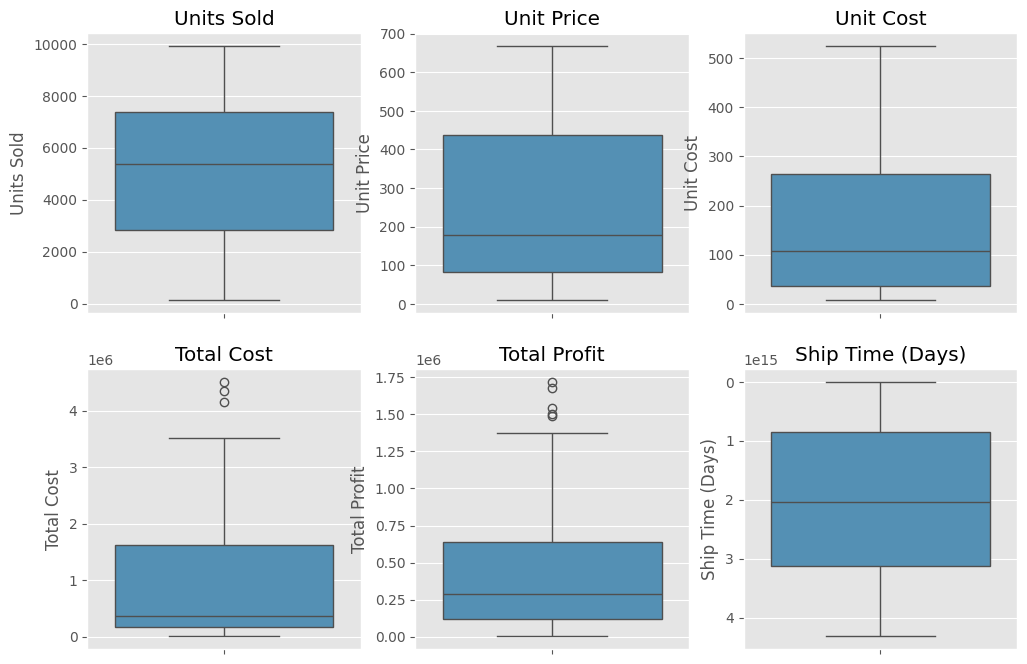

In [13]:
# outlier detection
contiuous_features = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit', 'Ship Time (Days)']

plt.figure(figsize = (12, 8))
    
plt.subplot(2, 3, 1)
sns.boxplot(df['Units Sold'], color = '#4494c4')
plt.title(contiuous_features[0])

plt.subplot(2, 3, 2)
sns.boxplot(df['Unit Price'], color = '#4494c4')
plt.title(contiuous_features[1])

plt.subplot(2, 3, 3)
sns.boxplot(df['Unit Cost'], color = '#4494c4')
plt.title(contiuous_features[2])

plt.subplot(2, 3, 4)
sns.boxplot(df['Total Cost'], color = '#4494c4')
plt.title(contiuous_features[3])

plt.subplot(2, 3, 5)
sns.boxplot(df['Total Profit'], color = '#4494c4')
plt.title(contiuous_features[4])

plt.subplot(2, 3, 6)
sns.boxplot(df['Ship Time (Days)'], color = '#4494c4')
plt.title(contiuous_features[5])

plt.show()

In [14]:
# removing outliers from 'total cost' using IQR method
Q1 = np.percentile(df['Total Cost'], 25)
Q3 = np.percentile(df['Total Cost'], 75)

IQR = Q3 - Q1

low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df['Total Cost'] > upp_q) | (df['Total Cost'] < low_q)
df_1 = df.drop(df[outliers_index].index)

In [15]:
# removing outliers from 'total profit' using IQR method
Q1 = np.percentile(df_1['Total Profit'], 25)
Q3 = np.percentile(df_1['Total Profit'], 75)

IQR = Q3 - Q1

low_q = Q1 - 1.5 * IQR
upp_q = Q3 + 1.5 * IQR

outliers_index = (df_1['Total Profit'] > upp_q) | (df_1['Total Profit'] < low_q)
df_2 = df_1.drop(df_1[outliers_index].index)

In [16]:
# viewing transformed dataframe
df_2.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sale Month,Sale Year,Ship Time (Days)
0,Asia,Bangladesh,Clothes,Online,Low,2017-01-13,187310731,2017-03-01,8263,109.28,35.84,902980.64,296145.92,606834.72,January,2017,47 days
1,Asia,Brunei,Office Supplies,Online,Low,2012-04-01,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.00,April,2012,37 days
2,Asia,Kyrgyzstan,Vegetables,Online,High,2011-06-24,814711606,2011-07-12,124,154.06,90.93,19103.44,11275.32,7828.12,June,2011,18 days
3,Asia,Laos,Vegetables,Offline,Critical,2011-09-15,789176547,2011-10-23,3732,154.06,90.93,574951.92,339350.76,235601.16,September,2011,38 days
4,Asia,Malaysia,Fruits,Offline,Low,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,November,2011,47 days


In [17]:
# exporting the transformed dataframe for visualizing it in tableau later
transformed_df_path = "amazon_sales_data_transformed.xlsx"
df_2.to_excel(transformed_df_path, index = False)

## Correlation Analysis

In [18]:
# loading the dataset
df = pd.read_excel("amazon_sales_data_transformed.xlsx")

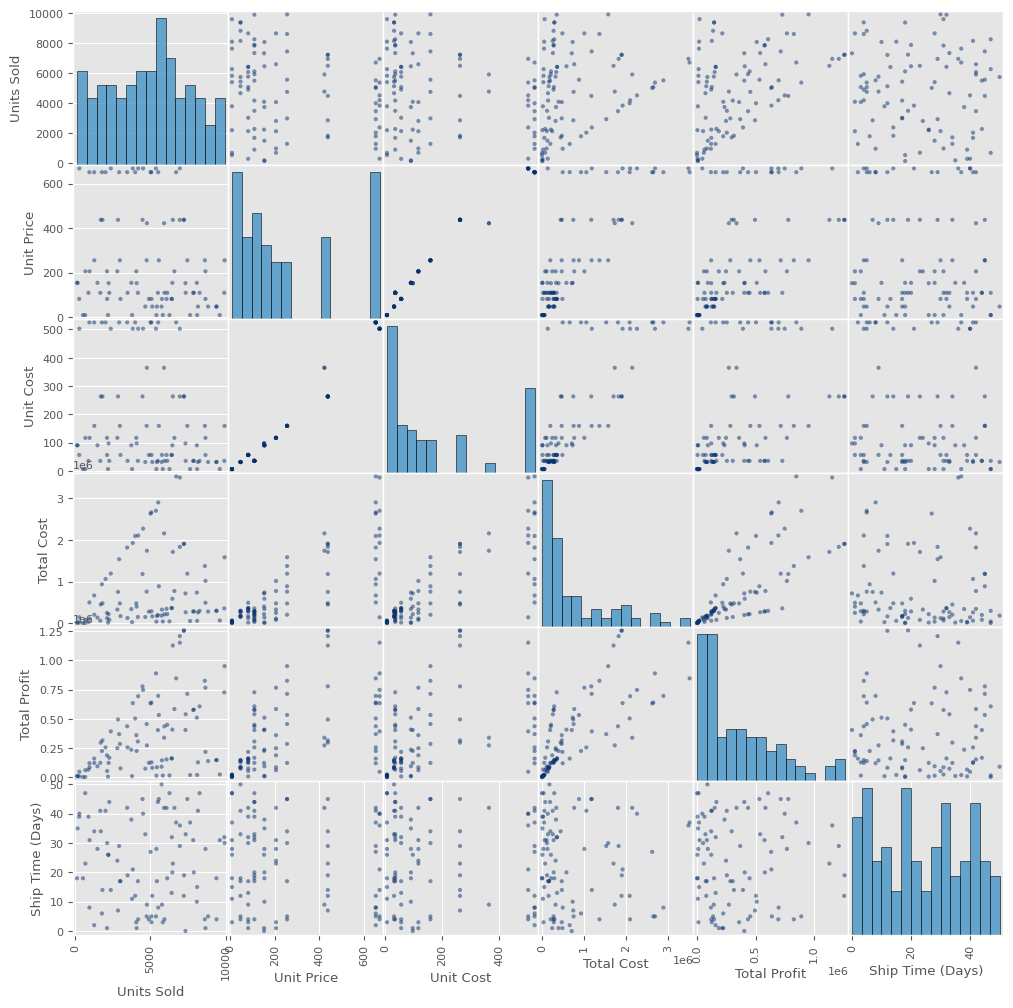

In [19]:
# plotting a scatter matrix for the continuous features

df_cont = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Cost', 'Total Profit', 'Ship Time (Days)']]

plt.rcParams.update({'font.size' : 8})
scatter = pd.plotting.scatter_matrix(df_cont, figsize = (12, 12), color = '#08326e',
                                     hist_kwds = {'bins':15, 'color' : '#4494c6', 'alpha' : 0.8, 'edgecolor' : 'black'})
plt.show()

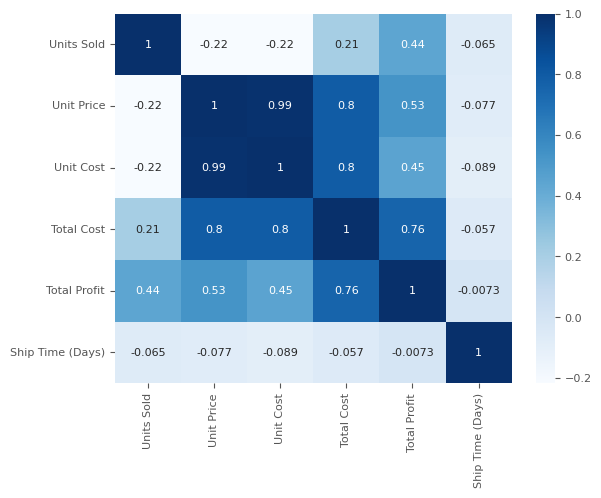

In [20]:
# viewing the correlation heatmap
cmap = ["#B0C4DE", "#A2B5CD", "#8A7F8B", "#778899", "#6A5ACD", "#483D8B"]
corr = df_cont.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()